<a href="https://colab.research.google.com/github/Sandwhaletree/Mai_Finlab/blob/main/B1_%E8%82%A1%E7%A5%A8%E8%B2%A1%E5%8B%99%E5%88%86%E6%9E%90/002_AR_Download_MOPS_230919.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🔥🔥🔥**公開資訊站_自動下載年報PDF(完整版)** ##

### **👉1.安裝自動瀏覽器程式** ###

In [ ]:
!apt-get update
!apt install chromium-chromedriver
!cp/usr/lib/chromium-browser/chromedriver/usr/bin
!pip install selenium #from selenium import webdriver
!pip install pdfplumber #import pdfplumber


Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [1,038 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:1

### **👉2.呼叫selenium相關套件，開啟Chrome自動瀏覽程式** ###
* 若於Jupyter上運行，則瀏覽器將會自動開啟畫面，惟在Colab上瀏覽器將在私底下運行，看不見畫面。

>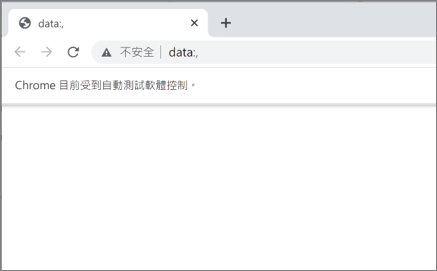

In [ ]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=options)
driver.implicitly_wait(10)

### **👉3.拆解url，帶入特定年度&公司代碼** ###
* year=想尋找之年度  (如:110=民國110年)
* number=想尋找之公司代碼  (如:2330=台積電)

* 瀏覽器將自動連結至公司電子資料查詢頁面
>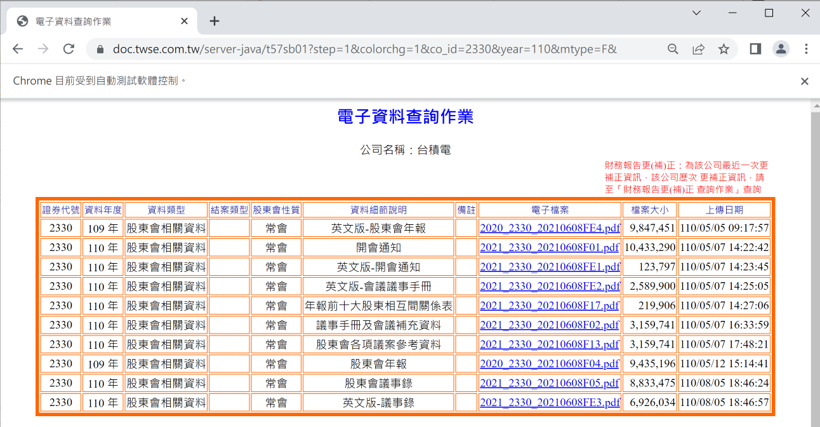

In [ ]:
year = 109 #需修改
number = 2330 #需修改
url = f"https://doc.twse.com.tw/server-java/t57sb01?step=1&colorchg=1&co_id={number}&year={year}&mtype=F&"
driver.get(url) #獲取股東會年報連結
print(url)

https://doc.twse.com.tw/server-java/t57sb01?step=1&colorchg=1&co_id=2891&year=110&mtype=F&


### **👉4.尋找股東會年報，自動點取pdf檔** ###
* 瀏覽器將自動導至股東會年報pdf下載處
> 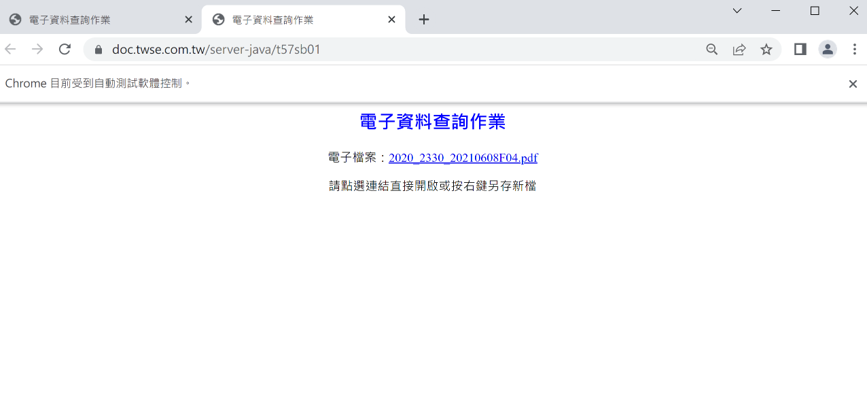


In [ ]:
link = driver.find_element("xpath",'//a[contains(., "F04") and contains(@href, ".pdf")]').get_attribute('href') #獲得pdf檔連結處
pdf_name = link.split('\"')[-2] #pdf名稱
driver.find_element("xpath",f"//a[contains(@href,'{link}')]").click() #針對股東會年報pdf按下去

### 👉**5.切換新分頁，開啟連結** ###
> 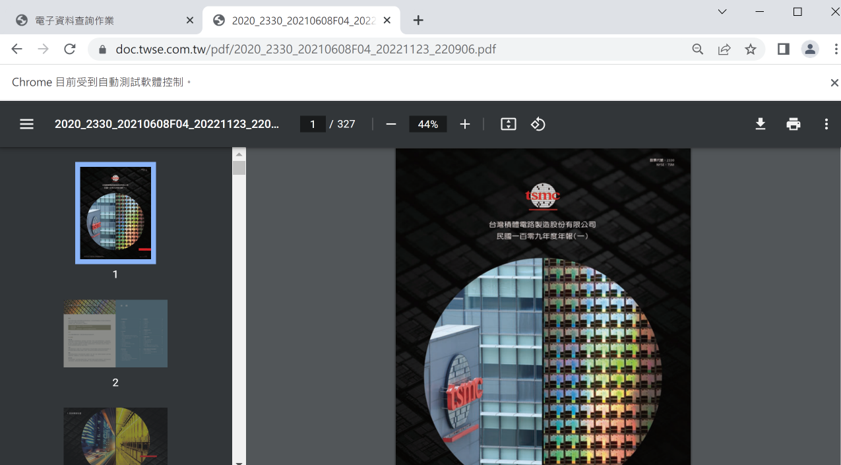

In [ ]:
windows=driver.window_handles  #獲得當前瀏覽器所有視窗
driver.switch_to.window(windows[-1]) #換到最新的視窗
time.sleep(3) #休息3s
url = driver.current_url #看看目前的url
url

'https://doc.twse.com.tw/server-java/t57sb01'

In [ ]:
from selenium.webdriver.common.action_chains import ActionChains #模擬滑鼠&鍵盤觸發事件，參數:https://www.selenium.dev/selenium/docs/api/py/webdriver/selenium.webdriver.common.action_chains.html
from selenium.webdriver.common.keys import Keys

right_click = driver.find_element("link text",pdf_name)
ActionChains(driver).double_click(right_click).perform() #左擊

### **👉6.pdf自動下載，載完將存至colab之content資料夾** ###
>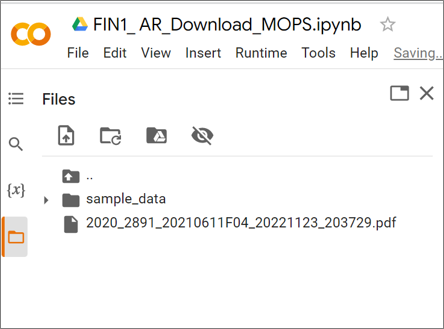

In [ ]:
from selenium.webdriver.chrome.options import Options

chrome_options = webdriver.ChromeOptions()
chrome_options.add_experimental_option(
 'prefs', {
 "download.default_directiory": './',
 "download.prompt_for_download": False,
 "download.directory_upgrade": True,
 "plugins.always_open_pdf_externally":True
 }
)

chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
# driver = webdriver.Chrome('chromedriver', options=options)
# driver.implicitly_wait(10)

browser = webdriver.Chrome('chromedriver',options=chrome_options)
browser.get(url)
time.sleep(15)
browser.quit()

### **👉 7.打開剛下載好的股東會年報pdf檔** ###
* pdf_name = '下載檔名.pdf'  (如:'2020_2891_20210611F04_20221123_203729.pdf')

In [ ]:
#打開pdf
import pandas as pd
import pdfplumber #安裝:https://pypi.org/project/pdfplumber/

pdf_name = '2020_2891_20210611F04_20221123_203729.pdf' #修改成下載檔名
pdf = pdfplumber.open(pdf_name)

### 👉 **8.讀取pdf年報內容** ###
* 注意: 年報第1頁從0算起，故range(0,2)代表第1頁至第3頁
* 若range(2,5)，代表讀取年報第3頁~第6頁，裡面的數字可自行修改

In [ ]:
#讀取pdf年報內容(p1-4頁)
#for p in range(1,len(pdf.pages)):
for p in range(2,5): #修改年報欲讀取頁數
    p = pdf.pages[p]
    table=p.extract_text()       #讀文字
    #table = pdf.pages[p].extract_table()  #讀表格
    print(table)
    print('*****************************************')

目錄
壹、致股東報告書  2
貳、公司簡介  6
叁、公司治理報告  15
一、組織系統  15
二、董事、監察人、主要經理人及顧問資料  19
三、公司治理運作情形  34
四、簽證會計師資訊  71
五、董事、監察人、經理人及依同一人或同一關係人持有同一金融控股公司已發行有表決權股份總數超過一定
  比率管理辦法第十一條規定應申報股權者，其股權移轉及股權質押變動情形  72
六、持股比例占前十名之股東，其相互間為關係人或為配偶、二親等以內之親屬關係之資訊  74
七、本公司及其子公司、本公司之董事、監察人、經理人及本公司直接或間接控制之事業對同一轉投資事業之
  持股數及綜合持股比例  75
肆、募資情形  77
一、公司資本及股份事項  77
二、公司債、特別股、海外存託憑證、員工認股權憑證、限制員工權利新股及併購之辦理情形  84
三、資金運用計畫執行情形  91
伍、營運概況  92
一、業務內容  92
二、跨業及共同行銷效益  112
三、市場及業務概況  112
四、從業員工  126
五、企業責任及道德行為  129
六、非擔任主管職務之全時員工人數、非擔任主管職務之全時員工薪資平均數及中位數，及前三者與前一年度
  之差異  133
七、資訊設備  133
八、勞資關係  138
九、重要契約  141
陸、財務概況  146
一、最近五年度簡明資產負債表及綜合損益表  146
二、最近五年度財務分析  151
三、關鍵績效指標  153
四、最近年度財務報告之審計委員會查核報告書  154
五、最近年度經會計師查核簽證之母子公司合併財務報告  154
六、本公司及其關係企業109年度及截至110年4月13日止財務週轉困難情事，對本公司財務狀況之影響  154
柒、財務狀況及財務績效之檢討分析與風險管理事項  155
一、財務狀況  155
二、財務績效  155
三、現金流量  156
四、109年度重大資本支出對財務業務之影響  156
五、109年度轉投資政策、其獲利或虧損之主要原因、改善計畫及未來一年投資計畫  156
六、風險管理事項  156
七、危機處理應變機制  170
八、其他重要事項  170
捌、特別記載事項  171
一、關係企業相關資料  171
二、109年度及截至110年4月13日止本公司私募有價證券辦理情形  17